# MCA on Dense Submatrices

### The "raw-order-features-full.csv" data holds 8 order-related features that fully span 1016 languages
### as well as some 'suplamantary' variables.

In [1]:
library(FactoMineR)
ofdata <- read.csv('raw-order-features-full.csv')
dim(ofdata)
ofdata[1:5,]

[1] 1016   14

X,wals_code,Name,genus,family,macroarea,X81A.Order.of.Subject..Object.and.Verb,X82A.Order.of.Subject.and.Verb,X83A.Order.of.Object.and.Verb,X87A.Order.of.Adjective.and.Noun,X143F.Postverbal.Negative.Morphemes,X143E.Preverbal.Negative.Morphemes,X143A.Order.of.Negative.Morpheme.and.Verb,X143G.Minor.morphological.means.of.signaling.negation
0,aab,Arapesh (Abu),Kombio-Arapesh,Torricelli,,2 SVO,1 SV,2 VO,2 Noun-Adjective,1 VNeg,4 None,2 VNeg,4 None
7,abi,Abipón,South Guaicuruan,Guaicuruan,South America,2 SVO,1 SV,2 VO,3 No dominant order,4 None,1 NegV,1 NegV,4 None
8,abk,Abkhaz,Northwest Caucasian,Northwest Caucasian,Eurasia,1 SOV,1 SV,1 OV,2 Noun-Adjective,2 [V-Neg],2 [Neg-V],11 Type 3 / Type 4,4 None
10,abn,Arabana,Central Pama-Nyungan,Pama-Nyungan,Australia,1 SOV,1 SV,1 OV,2 Noun-Adjective,4 None,1 NegV,1 NegV,4 None
12,abu,Abun,North-Central Bird's Head,West Papuan,Papunesia,2 SVO,1 SV,2 VO,2 Noun-Adjective,1 VNeg,1 NegV,14 ObligDoubleNeg,4 None


First there's the question of dependancy among variables. 143A includes the other 143 features, while the X81A values are special cases of 83A and 83A (this is different than the 143X case).
So do we drop the 143E,143F and 143G or do we drop 143A?

I'm not too sure about the right way to go with 81A,82A and 83A either. Maybe some association rules analysis could help here?
For the time being, let's just se which configuration produces the best eigenvalues.

###  Ommit 82A,83A

In [2]:
#X81A.Order.of.Subject..Object.and.Verb
#X82A.Order.of.Subject.and.Verb
#X83A.Order.of.Object.and.Verb
#X87A.Order.of.Adjective.and.Noun
#X143F.Postverbal.Negative.Morphemes
#X143E.Preverbal.Negative.Morphemes
#X143A.Order.of.Negative.Morpheme.and.Verb
#X143G.Minor.morphological.means.of.signaling.negation
ofdata$X <- NULL
ofdata$X82A.Order.of.Subject.and.Verb <- NULL
ofdata$X83A.Order.of.Object.and.Verb <- NULL
leave81A <- MCA(ofdata,quali.sup=1:5)
leave81A$eig[0:5,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.4680888,8.510705,8.510705
dim 2,0.3608499,6.560906,15.071611
dim 3,0.3386584,6.157426,21.229037
dim 4,0.3202653,5.823005,27.052042
dim 5,0.2804087,5.098341,32.150383


### Ommit 81A

In [3]:
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X81A.Order.of.Subject..Object.and.Verb <- NULL
no81A <- MCA(ofdata,quali.sup=1:5)
no81A$eig[0:5,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.4158755,9.390737,9.390737
dim 2,0.3050993,6.889339,16.280076
dim 3,0.2873699,6.488999,22.769075
dim 4,0.2757174,6.225876,28.994951
dim 5,0.2415907,5.455273,34.450224


### Ommit 143 E,F,G

In [4]:
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X143F.Postverbal.Negative.Morphemes <- NULL
ofdata$X143E.Preverbal.Negative.Morphemes <- NULL
ofdata$X143G.Minor.morphological.means.of.signaling.negation <- NULL
leave143A <- MCA(ofdata,quali.sup=1:5)
leave143A$eig[0:5,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.5070834,9.055060,9.05506
dim 2,0.4283583,7.649256,16.70432
dim 3,0.3751613,6.699309,23.40362
dim 4,0.2302106,4.110904,27.51453
dim 5,0.2218176,3.961029,31.47556


### Ommit 143A

In [5]:
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X143A.Order.of.Negative.Morpheme.and.Verb <- NULL
no143A <- MCA(ofdata,quali.sup=1:5)
no143A$eig[0:5,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.3922378,12.480293,12.48029
dim 2,0.3047575,9.696830,22.17712
dim 3,0.2740858,8.720910,30.89803
dim 4,0.2019441,6.425493,37.32353
dim 5,0.1715484,5.458357,42.78188


So it seems better to ommit 81A and 143A:

### Ommit 143A and 81A

In [6]:
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X143A.Order.of.Negative.Morpheme.and.Verb <- NULL
ofdata$X81A.Order.of.Subject..Object.and.Verb <- NULL
no143Ano81A <- MCA(ofdata,quali.sup=1:5)
no143Ano81A$eig[0:5,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.3421704,12.831391,12.83139
dim 2,0.2438795,9.145479,21.97687
dim 3,0.2326287,8.723577,30.70045
dim 4,0.2025273,7.594776,38.29522
dim 5,0.1855042,6.956408,45.25163


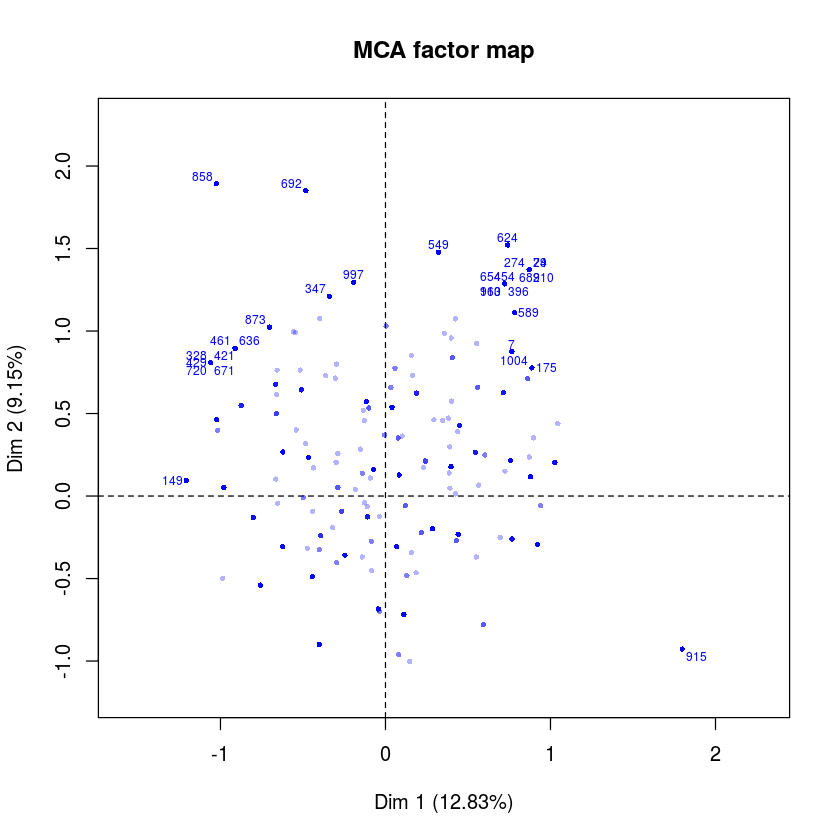

In [7]:
mca1 <- no143Ano81A
plot(mca1,invisible=c("var","quali.sup"),select="contrib 30",cex=0.6)

It's not clear to me how to cluster this, let's just look at left vs. right.

###  on the right:

In [8]:
ofdata[c(624,274,589,7,1004,175,29,210,963,396,654,110,915),c('Name','genus','family','macroarea')]

,Name,genus,family,macroarea
624,Mixe (Ayutla),Mixe-Zoque,Mixe-Zoque,
274,Guarijío,Tarahumaran,Uto-Aztecan,North America
589,Mara,Mara,Mangarrayi-Maran,Australia
7,Acehnese,Malayo-Sumbawan,Austronesian,Eurasia
1004,Yawuru,Nyulnyulan,Nyulnyulan,Australia
175,Coos (Hanis),Coosan,Oregon Coast,North America
29,Alawa,Alawa,Mangarrayi-Maran,Australia
210,Djambarrpuyngu,Western Pama-Nyungan,Pama-Nyungan,Australia
963,Wikchamni,Yokuts,Penutian,North America
396,Klamath,Klamath-Modoc,Penutian,North America


## On the Left

In [9]:
ofdata[c(671,149,421,461,720,692,858,636,873,328),c('Name','genus','family','macroarea')]

,Name,genus,family,macroarea
671,Nivkh,Nivkh,Nivkh,Eurasia
149,Choctaw,Muskogean,Muskogean,North America
421,Kolami,Central Dravidian,Dravidian,Eurasia
461,Karkar-Yuri,Karkar-Yuri,Karkar-Yuri,Papunesia
720,Pawaian,Pawaian,Teberan-Pawaian,Papunesia
692,Newar (Dolakha),Mahakiranti,Sino-Tibetan,Eurasia
858,Tabla,Sentani,Sentani,Papunesia
636,Nasioi,East Bougainville,East Bougainville,Papunesia
873,Tshangla,Bodic,Sino-Tibetan,Eurasia
328,Ijo (Kolokuma),Ijoid,Ijoid,Africa


It seems that Euroasia and Papua are on the left and North America and Australia on the right. But it doesn't really show in this plot:

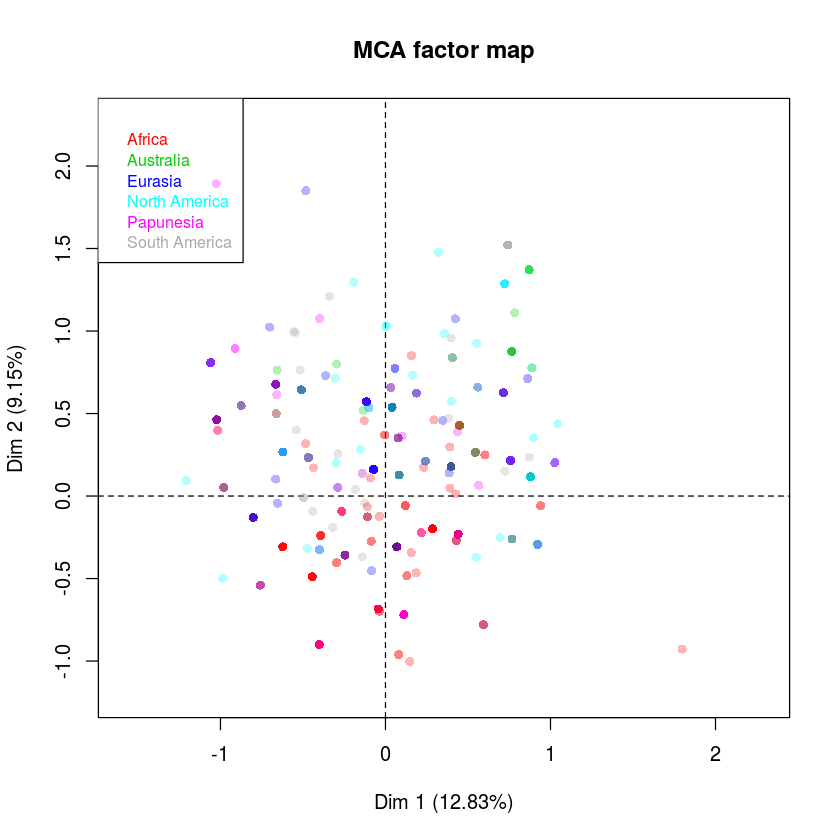

In [10]:
plot(mca1,invisible=c("quali.sup","var"),select="none", habillage="macroarea")

Let's see how the variables are projected:

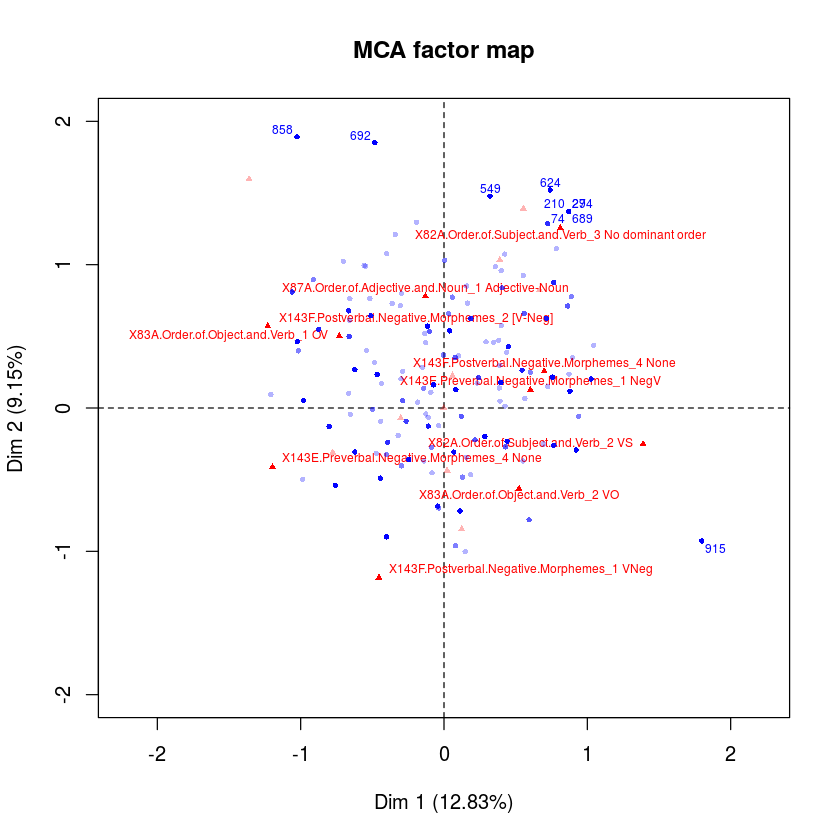

In [11]:
plot(mca1,invisible=c("quali.sup"),selectMod="contrib 10",select="contrib 10",cex=0.6,xlim=c(-2,2),ylim=c(-2,2))

In [12]:
mca1$var$eta

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A.Order.of.Subject.and.Verb,0.37383475,0.12405758,0.32059532,0.06640152,0.25741223
X83A.Order.of.Object.and.Verb,0.38487265,0.38717942,0.42939780,0.05183928,0.02256387
X87A.Order.of.Adjective.and.Noun,0.01793003,0.36403854,0.11597677,0.10841038,0.06230067
X143F.Postverbal.Negative.Morphemes,0.65139580,0.47470038,0.19246123,0.42766463,0.20020807
X143E.Preverbal.Negative.Morphemes,0.61231202,0.07665271,0.25217771,0.06863355,0.46950791
X143G.Minor.morphological.means.of.signaling.negation,0.01267732,0.03664809,0.08516355,0.49221473,0.10103251


So both 143F and 143E are most varied along the first dimension, where we see separation too in the plots:

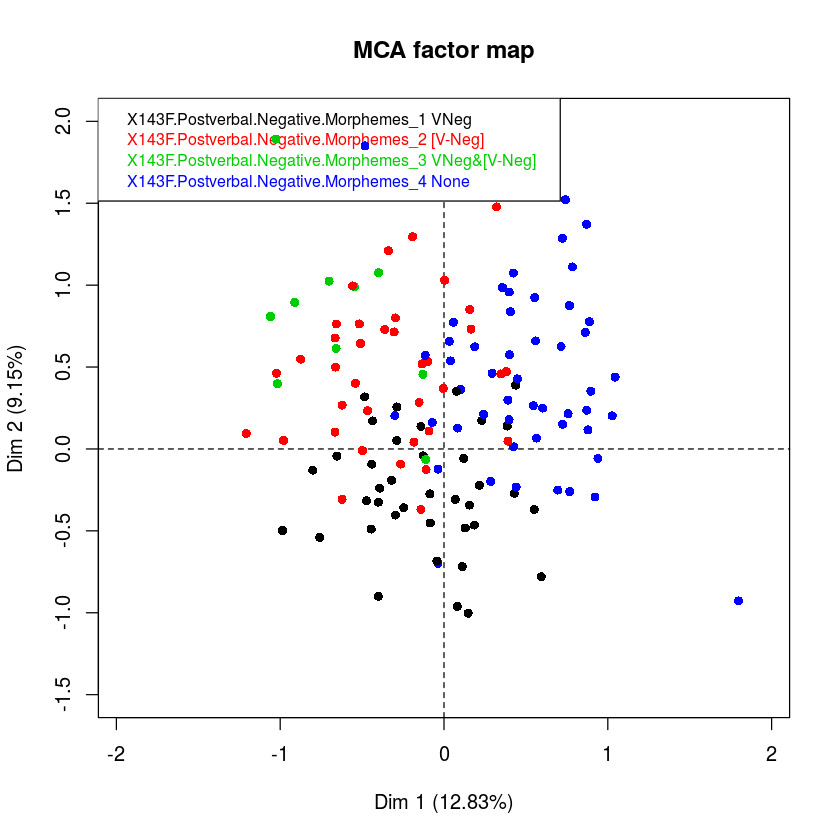

In [13]:
plot(mca1,choix="ind",invisible=c("quali.sup","var"),label="none",xlim=c(-1.5,1.5),ylim=c(-1.5,2),
    habillage="X143F.Postverbal.Negative.Morphemes")

So it seems that None is separated from the rest along the first dimension, while VNeg is separated from V-Neg Along the second dimension. There difference between V-Neg and VNeg is whether the negation morpheme is a word or a suffix.

Further, we can see that the "both" option (green) clusters more with the suffix variant.

Now the other side of the verb:

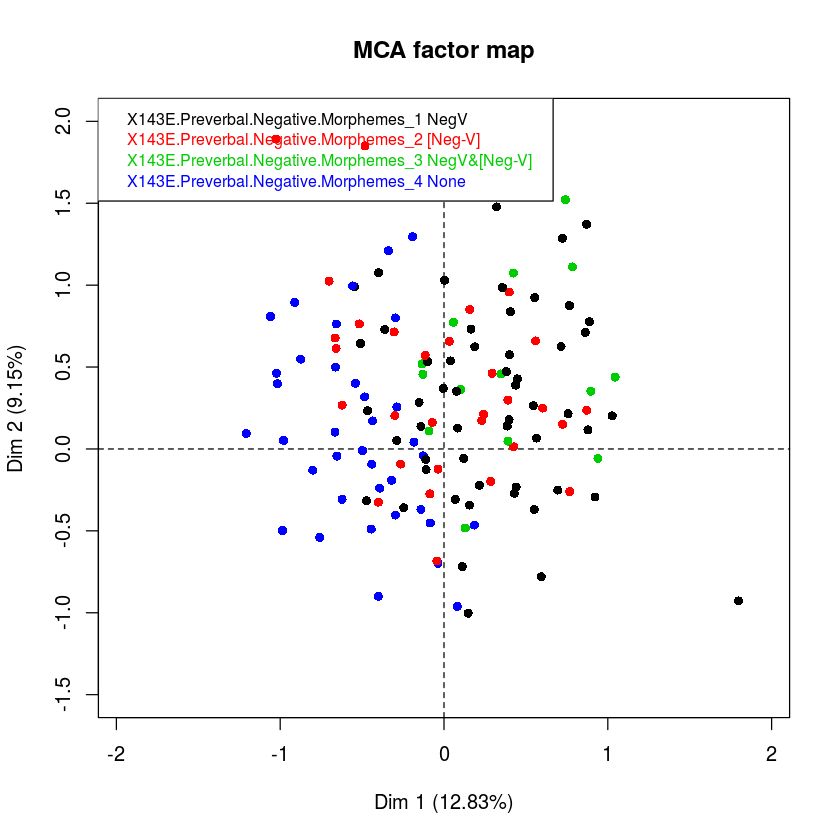

In [14]:
plot(mca1,choix="ind",invisible=c("quali.sup","var"),label="none",xlim=c(-1.5,1.5),ylim=c(-1.5,2),
    habillage="X143E.Preverbal.Negative.Morphemes")

Again, mainly, None is separated from the rest. But here the green goes more with NegV then with Neg-V m... Could there be some fundamental difference between suffixes and prefixes besides their position?

Mayb it has something to do with the head parameter.

## About the Head Parameter

According to this article: http://www.linguistics.ucla.edu/faciliti/wpl/issues/wpl17/papers/40_polinsky.pdf,
languages can be classified to 5 classes with respect to this assumed property. These classes and some example languages are given in this table:

| Rigid head-final  | Non-rigid  head-final | Clearly head-initial | SVO/head-initial | SVO,sundry |
| ----------------- | ---------------------| --------------------|-----------------|------------| 
| Japanese          | German               | Tongan              | Indonesian      | English
| Korean            | Persian              | Mayan (most)        | Yucatec Mayan   | Russian
| Tamil             | Latin                | Irish               |                 | Romance languages
|                   | Tsez                 |                     |                 | Bantu languages
|                   | Avar                 |                     |                 |
|                   | Basque               |                     |                 |

In [15]:
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X143A.Order.of.Negative.Morpheme.and.Verb <- NULL
ofdata$X81A.Order.of.Subject..Object.and.Verb <- NULL
langids = which(ofdata$Name %in% c(
    #class 1
'Japanese', 'Korean','Tamil',
    #class 2
'German', 'Persian', 'Latin','Tsez', 'Avar','Basque',
    #class 3
'Tongan','Irish', 'Huastec','Sipakapense', 'Chontal Maya','Mam','Tzutujil','Jakaltek',
    #class 4
'Indonesian',
    #class 5
'English','Russian','Catalan', 'French','Italian', 'Portuguese','Romanian', 
'Spanish', 'Sardinian','Zulu','Rundi','Swahili','Yemba','Yaka','Talinga','Tabwa'
))
ofdata[langids,][c("Name","genus","family")]

,Name,genus,family
66,Avar,Avar-Andic-Tsezic,Nakh-Daghestanian
127,Basque,Basque,Basque
172,Chontal Maya,Mayan,Mayan
182,Catalan,Romance,Indo-European
228,English,Germanic,Indo-European
242,French,Romance,Indo-European
257,German,Germanic,Indo-European
312,Huastec,Mayan,Mayan
333,Indonesian,Malayo-Sumbawan,Austronesian
336,Irish,Celtic,Indo-European


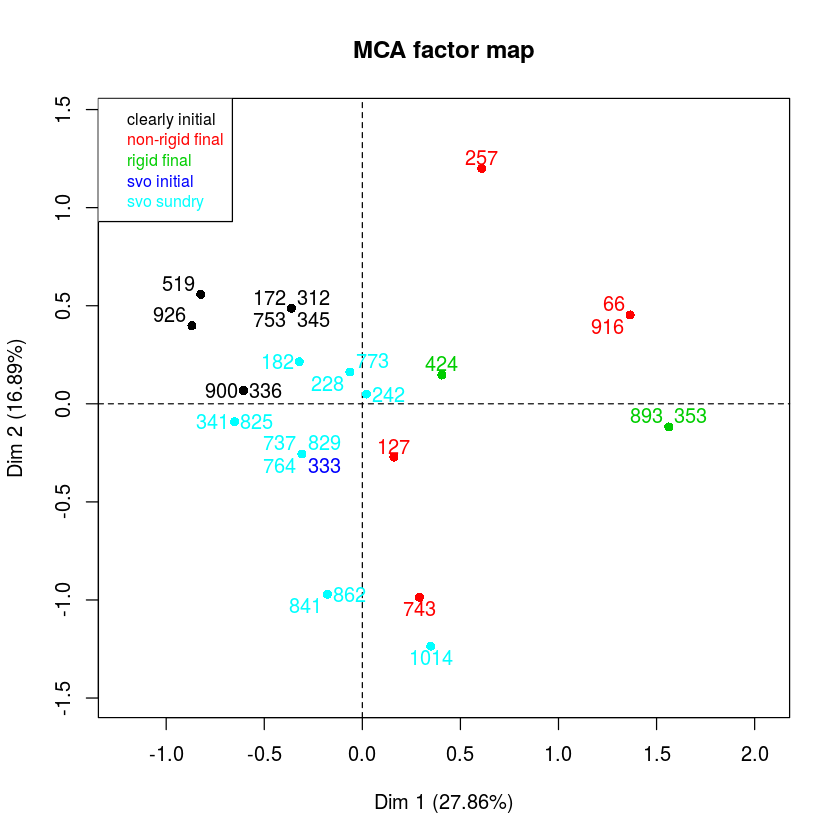

In [16]:
headclass <- function(name) {
    ans <- 'unknown'
    if(name %in% c('Japanese','Korean','Tamil')) {
        ans <- 'rigid final'
    }
    if(name %in% c('German','Persian','Tsez','Avar','Basque')) {
        ans <- 'non-rigid final'
    }
    if(name %in% c('Tongan','Irish', 'Huastec','Sipakapense', 'Chontal Maya','Mam','Tzutujil','Jakaltek')) {
        ans <- 'clearly initial'
    }
    if(name == 'Indonesian') {
        ans <- 'svo initial'
    }
    if(name %in% c('English','Russian','Catalan', 'French','Italian', 'Portuguese','Romanian', 
'Spanish', 'Sardinian','Zulu','Rundi','Swahili','Yemba','Yaka','Talinga','Tabwa')) {
        ans <- 'svo sundry'
    }
    ans
}
x <- sapply(ofdata$Name,headclass)
ofdata <- cbind(headclass=as.factor(x),ofdata)
mca2 <- MCA(ofdata[langids,],quali.sup=1:6,graph=FALSE)
plot(mca2,habillage="headclass",invisible=c("var","quali.sup"))

This seems reasonable. But it's only on the known languages.

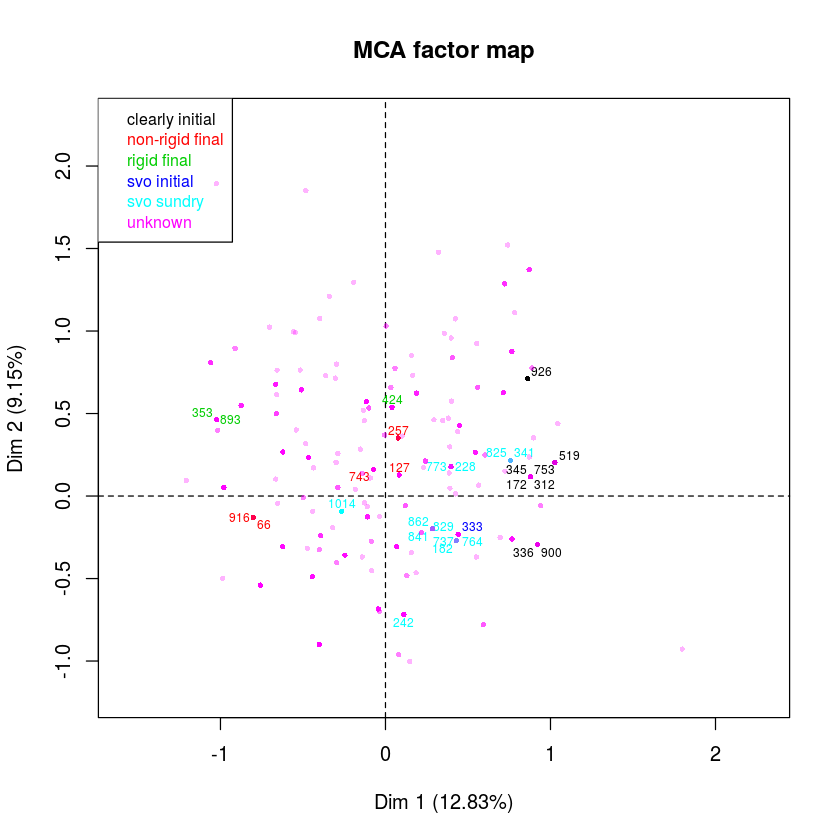

In [17]:
mca3 <- MCA(ofdata,quali.sup=1:6,graph=FALSE)
plot(mca3,choix="ind",select=langids,habillage="headclass",invisible=c("var","quali.sup"),cex=0.6)

But the eigen values are meagre. Maybe it's better to try and find as many "known" languages as possible.

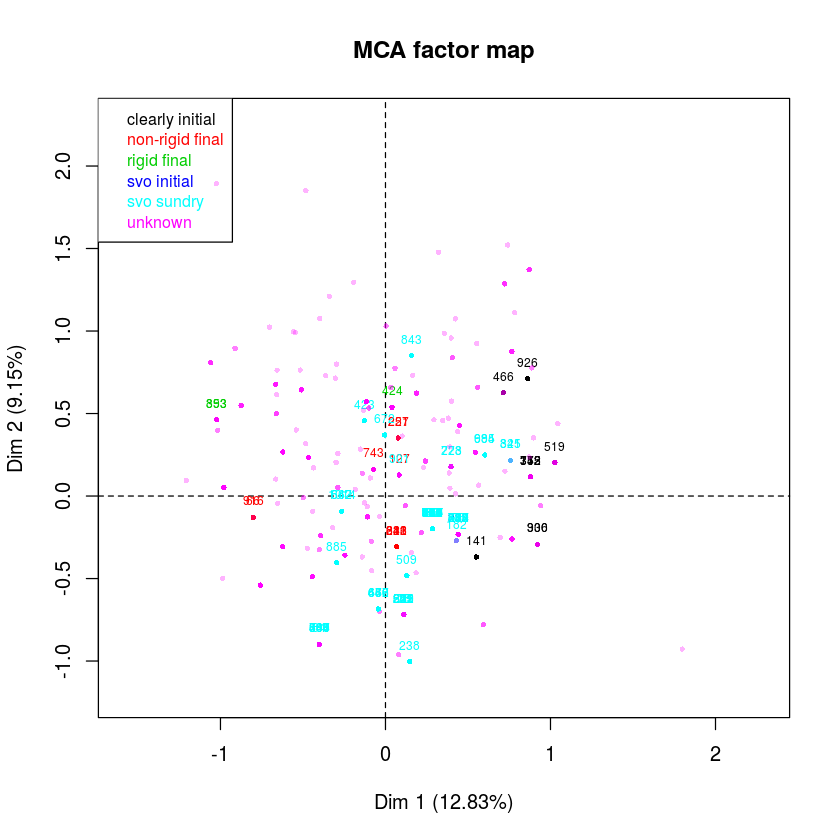

In [19]:
findall <- function(l) {
    which(ofdata$family %in% l | ofdata$Name %in% l | ofdata$genus %in% l)
}
class1 = findall(c('Japanese','Korean','Tamil'))
class2 = findall(c('German', 'Persian', 'Latin','Tsez', 'Avar','Basque','Germanic'))
class3 = findall(c('Tongan','Mayan','Irish'))
class4 = findall(c('Indonesian','Yucatec'))
class5 = findall(c('English','Russian','Romance','Bantoid'))

headclass2 <- function(i) {
    ans <- 'unknown'
    if(i %in% class1) {
        ans <- 'rigid final'
    }
    if(i %in% class2) {
        ans <- 'non-rigid final'
    }
    if(i %in% class3) {
        ans <- 'clearly initial'
    }
    if(i %in% class4) {
        ans <- 'svo initial'
    }
    if(i %in% class5) {
        ans <- 'svo sundry'
    }
    ans
}
knownids = unique(unlist(c(class1,class2,class3,class4,class5)))
y <- sapply(1:1016,headclass2)
ofdata$headclass <- as.factor(y)
mca4 <- MCA(ofdata,quali.sup=1:6,graph=FALSE)
plot(mca4,choix="ind",select=knownids,
     habillage="headclass",invisible=c("var","quali.sup"),cex=0.6)

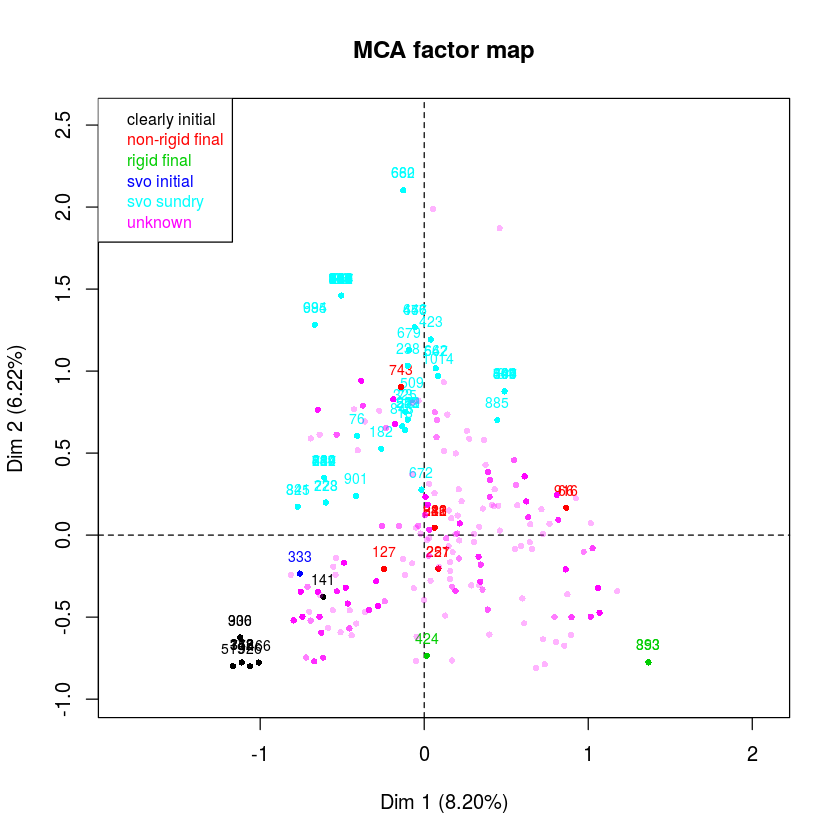

In [20]:
# how come with the original features we get a clearer separation? (question for Dan)
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
knownids = unique(unlist(c(class1,class2,class3,class4,class5)))
y <- sapply(1:1016,headclass2)
ofdata$headclass <- as.factor(y)
mca5 <- MCA(ofdata,quali.sup=1:6,graph=FALSE)
plot(mca5,choix="ind",select=knownids,
     habillage="headclass",invisible=c("var","quali.sup"),cex=0.7)

It should be interesting to see how the noun/verb ratio the article talks about is reflected on the order features MCA.

In [21]:
findall2 <- function(l,df) {
    n <- grep(paste(l,collapse="|"),df$Name)
    g <- which(df$genus %in% l)
    f <- which(df$family %in% l)
    unique(unlist(c(n,g,f)))
}

low <- findall2(c('Halkomelem','Zapotec','Malagasy','Maori','Zinacantec Tzotzil','Irish'),ofdata)
medium <- findall2(c('Bahasa','Vietnamese','Hebrew','Swahili','Romanian','Greek','Spanish'),ofdata)
high <- findall2(c('Polish','Korean','Japanese','Tamil','Chinese','English',
                 'Czech','German','Basque','Archi','Telugu','Latin','Dutch','Tsez','Hungarian'),ofdata)

ratioclass <- function(i) {
    ans = 'unkown'
    if(i %in% low) {
        ans <- 'low'
    }
    if(i %in% medium) {
        ans <- 'medium'
    }
    if(i %in% high) {
        ans <- 'high'
    }
    ans
}
ofdata <- read.csv('raw-order-features-full.csv')
ofdata$X <- NULL
ofdata$X143A.Order.of.Negative.Morpheme.and.Verb <- NULL
ofdata$X81A.Order.of.Subject..Object.and.Verb <- NULL
y <- sapply(1:1016,ratioclass)
ofdata <- cbind(ratioclass=as.factor(y),ofdata)
knownratios <- unique(unlist(c(low,medium,high)))
mca6 <- MCA(ofdata,quali.sup=1:6,graph=FALSE)

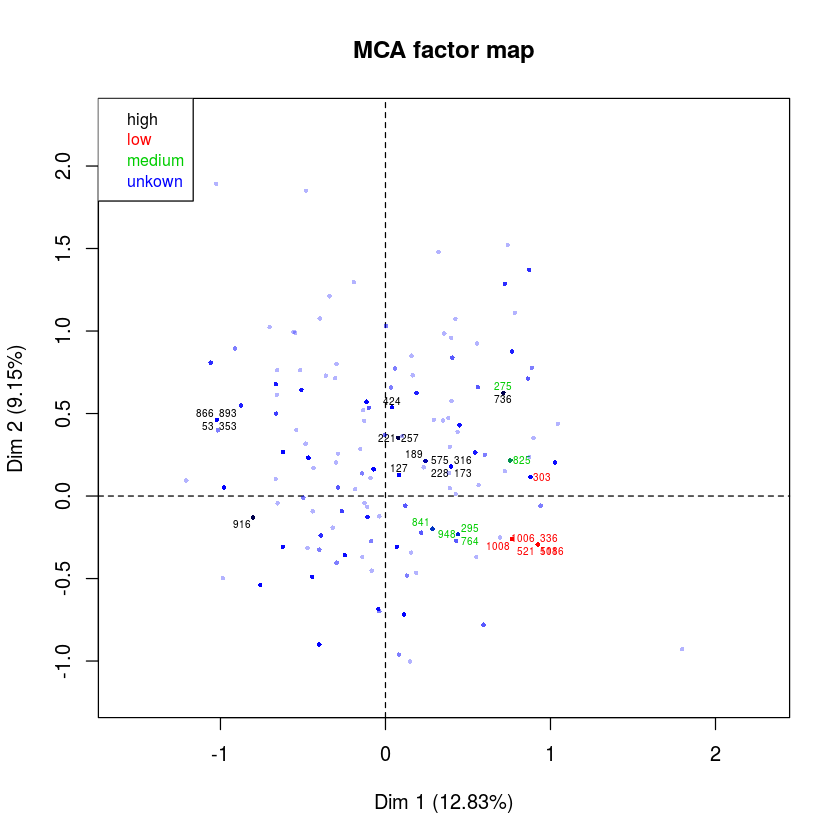

In [22]:
plot(mca6,choix="ind",invisible=c("var","quali.sup"),
     select=knownratios,habillage="ratioclass",cex=0.5)

## Not Just Order

In [23]:
full107 <- read.csv('raw-complete-107x6.csv')
full107$X <- NULL
mca7 <- MCA(full107,quali.sup=1:4,quanti.sup=5:6,graph=FALSE)
mca7$eig[0:5,]
#plot(mca7,selectMod="contrib 3",select="none",invisible=c("quanti.sup","quali.sup"))]
mca7$var$eta

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.5183717,14.810619,14.81062
dim 2,0.3505079,10.014513,24.82513
dim 3,0.3249840,9.285256,34.11039
dim 4,0.2881268,8.232194,42.34258
dim 5,0.2704147,7.726135,50.06872


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X82A.Order.of.Subject.and.Verb,0.2384257951,0.05634546,0.06735170,0.003003013,0.011320590
X83A.Order.of.Object.and.Verb,0.4278424661,0.29100837,0.14962589,0.175889993,0.004415206
X143F.Postverbal.Negative.Morphemes,0.7663390962,0.24781764,0.28351862,0.470073692,0.678913840
X143E.Preverbal.Negative.Morphemes,0.7808411934,0.62381463,0.49386274,0.235998285,0.100645203
X143A.Order.of.Negative.Morpheme.and.Verb,0.8959912483,0.79459280,0.87497693,0.841904903,0.823709108
X143G.Minor.morphological.means.of.signaling.negation,0.0007902851,0.08946873,0.08056783,0.001890918,0.003484367


In [24]:
diverse5 <- read.csv('five-diversex107.csv')
diverse5$X <- NULL
mca8 <- MCA(diverse5,quali.sup=1:4,quanti.sup=5:6,graph=FALSE)
mca8$eig[0:5,]
mca8$var$eta

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.5880126,6.533473,6.533473
dim 2,0.5406018,6.006687,12.540160
dim 3,0.4829907,5.366563,17.906723
dim 4,0.4730341,5.255935,23.162658
dim 5,0.4708502,5.231668,28.394326


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X81A.Order.of.Subject..Object.and.Verb,0.7458731,0.4730483,0.6619012,0.6094283,0.5979990
X33A.Coding.of.Nominal.Plurality,0.3285949,0.4054196,0.3252718,0.1743288,0.1392501
X51A.Position.of.Case.Affixes,0.5546658,0.3778362,0.4110676,0.3193190,0.4374069
X143A.Order.of.Negative.Morpheme.and.Verb,0.4852707,0.5715323,0.1716313,0.3910953,0.3336397
X144A.Position.of.Negative.Word.With.Respect.to.Subject..Object..and.Verb,0.8256584,0.8751726,0.8450817,0.8709991,0.8459552


So with the strict full x 107 submatix the features are more or less the order features we've seen on 1016 languages. So despite the lesser eigenvalues, let's see what the most diverse 5 give us.

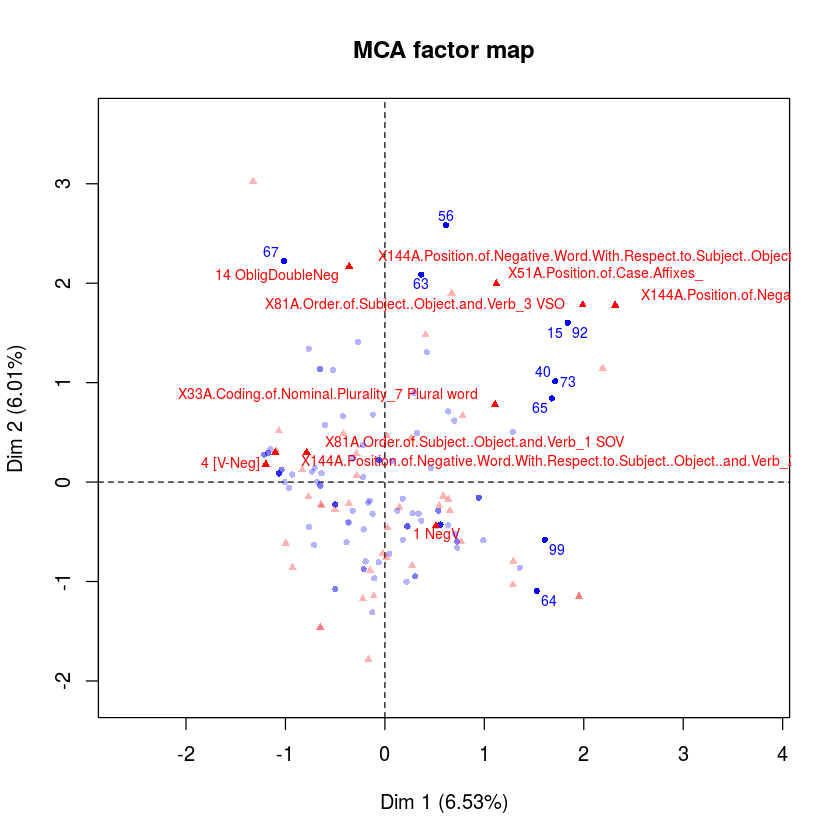

In [25]:
plot(mca8,invisible=c("quanti.sup","quali.sup"),selectMod="contrib 10",select="contrib 10",cex=0.7)

In [26]:
diverse5[c(56,67,63),c('Name','genus','family','macroarea')]

,Name,genus,family,macroarea
56,Krongo,Kadugli,Kadu,Africa
67,Maricopa,Yuman,Hokan,North America
63,Luvale,Bantoid,Niger-Congo,Africa


In [27]:
diverse5[c(64,99),c('Name','genus','family','macroarea')]

,Name,genus,family,macroarea
64,Malagasy,Barito,Austronesian,Africa
99,Wari',Chapacura-Wanham,Chapacura-Wanham,South America


In [28]:
diverse5[c(15,92,73,40,65),c('Name','genus','family','macroarea')]

,Name,genus,family,macroarea
15,Chamorro,Chamorro,Austronesian,Papunesia
92,Tagalog,Greater Central Philippine,Austronesian,Papunesia
73,Mixtec (Chalcatongo),Mixtecan,Oto-Manguean,North America
40,Jakaltek,Mayan,Mayan,North America
65,Maori,Oceanic,Austronesian,Papunesia


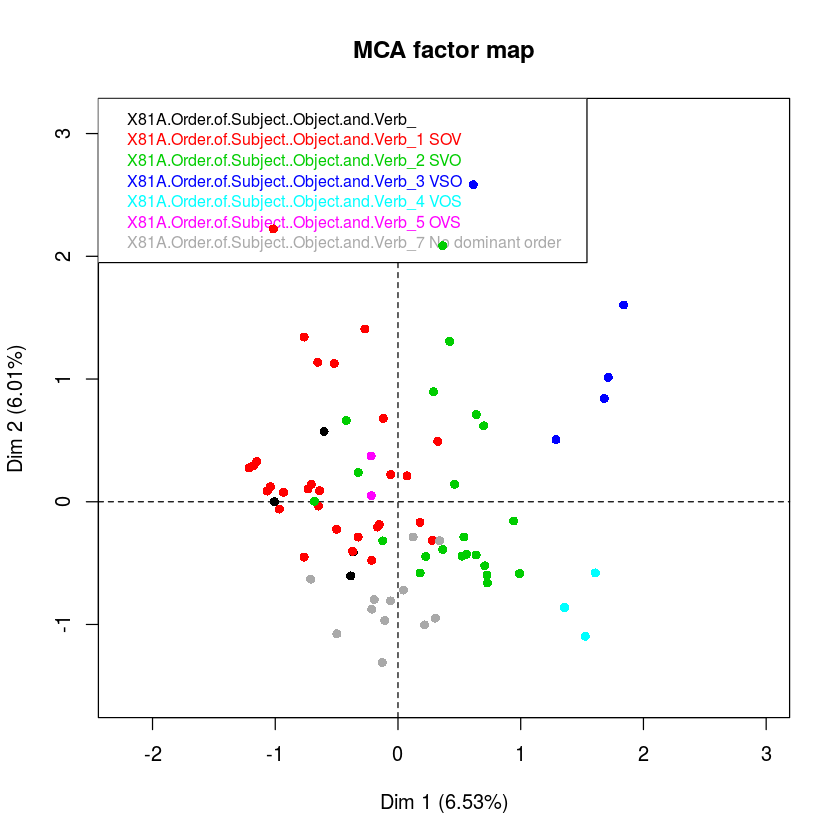

In [29]:
plot(mca8,choix="ind",habillage="X81A.Order.of.Subject..Object.and.Verb",
     invisible=c("var","quali.sup","quanti.sup"),label="none")

In [30]:
class1 = findall2(c('Japanese','Korean','Tamil'),diverse5)
class2 = findall2(c('German', 'Persian', 'Latin','Tsez', 'Avar','Basque','Germanic'),diverse5)
class3 = findall2(c('Tongan','Mayan','Irish'),diverse5)
class4 = findall2(c('Indonesian','Yucatec'),diverse5)
class5 = findall2(c('English','Russian','Romance','Bantoid'),diverse5)

headclass2 <- function(i) {
    ans <- 'unknown'
    if(i %in% class1) {
        ans <- 'rigid final'
    }
    if(i %in% class2) {
        ans <- 'non-rigid final'
    }
    if(i %in% class3) {
        ans <- 'clearly initial'
    }
    if(i %in% class4) {
        ans <- 'svo initial'
    }
    if(i %in% class5) {
        ans <- 'svo sundry'
    }
    ans
}
knownids = unique(unlist(c(class1,class2,class3,class4,class5)))
y <- sapply(1:107,headclass2)
diverse5 <- read.csv('five-diversex107.csv')
diverse5$X <- NULL
diverse5 <- cbind(headclass = as.factor(y), diverse5)
diverse5[1,]

headclass,Name,genus,family,macroarea,longitude,latitude,X81A.Order.of.Subject..Object.and.Verb,X33A.Coding.of.Nominal.Plurality,X51A.Position.of.Case.Affixes,X143A.Order.of.Negative.Morpheme.and.Verb,X144A.Position.of.Negative.Word.With.Respect.to.Subject..Object..and.Verb
unknown,Abkhaz,Northwest Caucasian,Northwest Caucasian,Eurasia,41,43.08333,1 SOV,2 Plural suffix,9 No case affixes or adpositional clitics,11 Type 3 / Type 4,20 MorphNeg


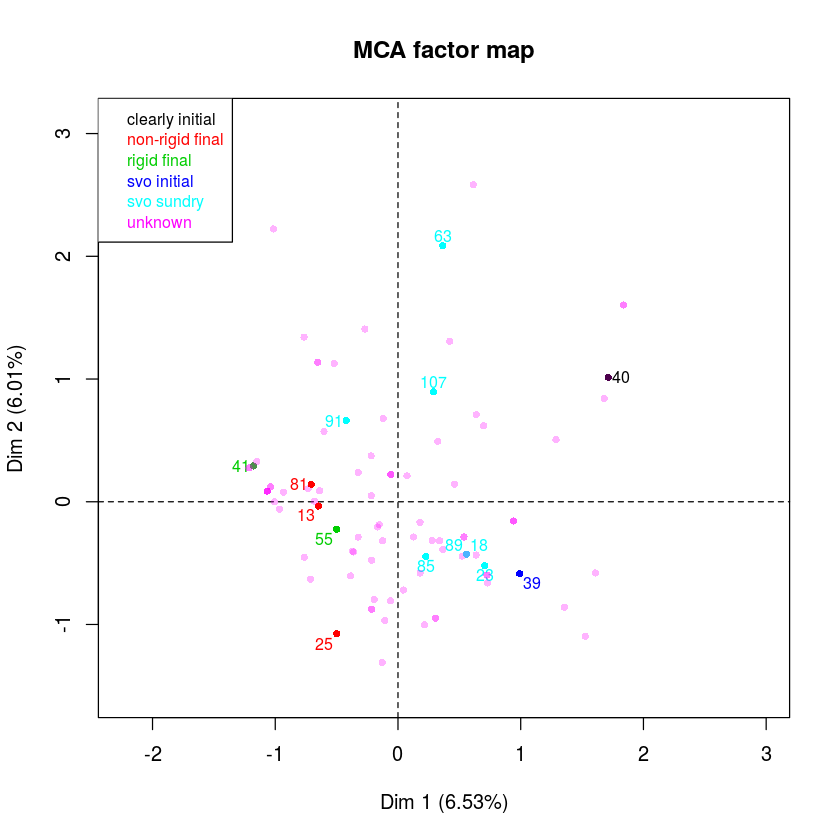

In [31]:
mca9 <- MCA(diverse5,quali.sup=1:5,quanti.sup=6:7,graph=FALSE)
plot(mca9,choix="ind",select=knownids,
     habillage="headclass",invisible=c("var","quali.sup"),cex=0.8)

I think the next step should be systematically finding as many sigma-covering subsets of the table.

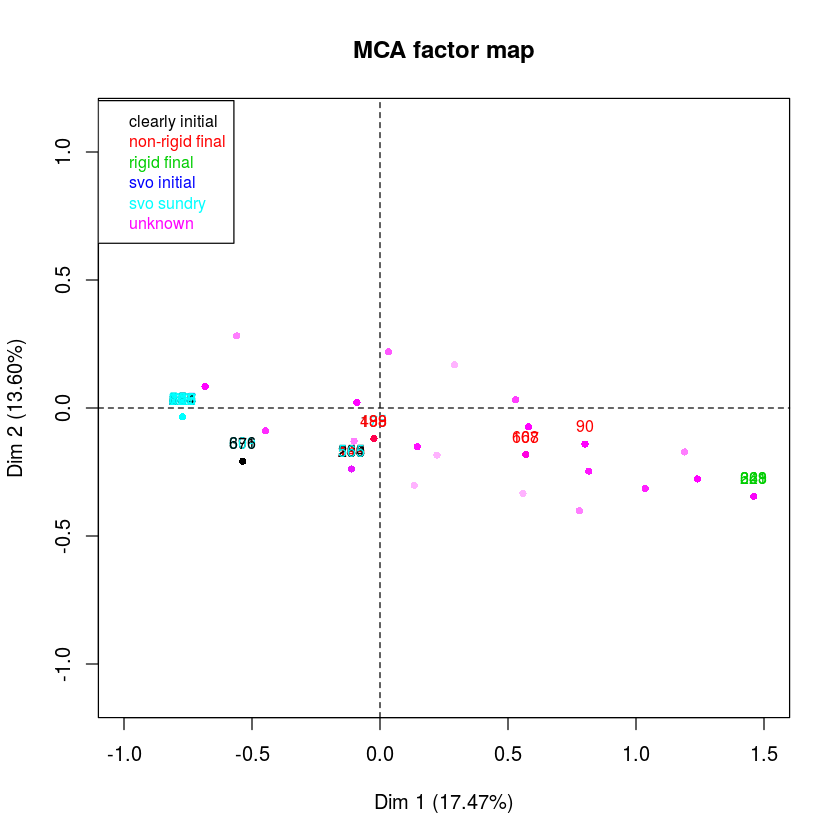

In [52]:
dat = read.csv('headp-relevant-3features.csv')
dat$X <- NULL
class1 = findall2(c('Japanese','Korean','Tamil'),dat)
class2 = findall2(c('German', 'Persian', 'Latin','Tsez', 'Avar','Basque','Germanic'),dat)
class3 = findall2(c('Tongan','Mayan','Irish'),dat)
class4 = findall2(c('Indonesian','Yucatec'),dat)
class5 = findall2(c('English','Russian','Romance','Bantoid'),dat)

headclass3 <- function(i) {
    ans <- 'unknown'
    if(i %in% class1) {
        ans <- 'rigid final'
    }
    if(i %in% class2) {
        ans <- 'non-rigid final'
    }
    if(i %in% class3) {
        ans <- 'clearly initial'
    }
    if(i %in% class4) {
        ans <- 'svo initial'
    }
    if(i %in% class5) {
        ans <- 'svo sundry'
    }
    ans
}
knownids = unique(unlist(c(class1,class2,class3,class4,class5)))
y <- sapply(1:dim(dat)[1],headclass3)
dat <- cbind(headclass = as.factor(y), dat)
mca10 <- MCA(dat,quali.sup=1:11,graph=FALSE)
plot(mca10,choix="ind",select=knownids,
     habillage="headclass",invisible=c("var","quali.sup"),cex=0.8, xlim=c(-1,1.5),ylim=c(-1,1))

In [49]:
dim(dat[which(dat$headclass != 'unknown'),c('Name','headclass')])

[1] 60  2

In [50]:
dim(dat)

[1] 728  14